In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [6]:
#load data
dataset = load_iris()

In [7]:
#create x as feature, y as response
x = dataset.data
y = dataset.target

In [19]:
#training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [21]:
#knn classificetion accuracy with k=1 
knn = KNeighborsClassifier(n_neighbors=1) 
knn.fit(x_train,y_train) 
y_pred = knn.predict(x_test) 
print('Accuracy:',metrics.accuracy_score(y_test,y_pred)*100)

Accuracy: 97.3684210526


In [22]:
#k_fold cross_validation_score

from sklearn.model_selection import cross_val_score

In [24]:
#10 fold cross-validation
knn = KNeighborsClassifier(n_neighbors=5)
scr = cross_val_score(knn,x,y,cv=10,scoring='accuracy')
print(scr*100)

[ 100.           93.33333333  100.          100.           86.66666667
   93.33333333   93.33333333  100.          100.          100.        ]


In [26]:
#getting mean of accuracy
print(scr.mean())

0.966666666667


In [42]:
# search for best value of k for knn
k_range = range(1,31)
scrs = []
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k)
    scr = cross_val_score(knn,x,y,cv=10, scoring='accuracy')
    scrs.append(scr.mean())
print(scrs)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


Text(0,0.5,'Cross-Validation Accuracy')

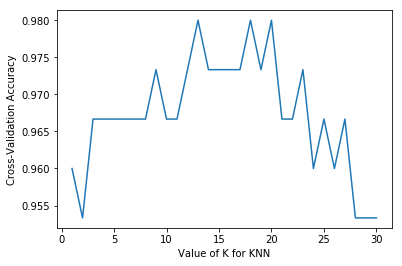

In [35]:
#visualization of scrs
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, scrs)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')

In [39]:
# comparing two models
# KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=20)
print('KNN accuracy:',cross_val_score(knn,x,y,cv=10,scoring='accuracy').mean()*100)

KNN accuracy: 98.0


In [40]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
print("LogisticRegression accuracy:",cross_val_score(lr,x,y,cv=10, scoring='accuracy').mean()*100)

LogisticRegression accuracy: 95.3333333333
